<a href="https://colab.research.google.com/github/ricnov/BayesianRegression/blob/master/Copy_of_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COVID-ITALY-19


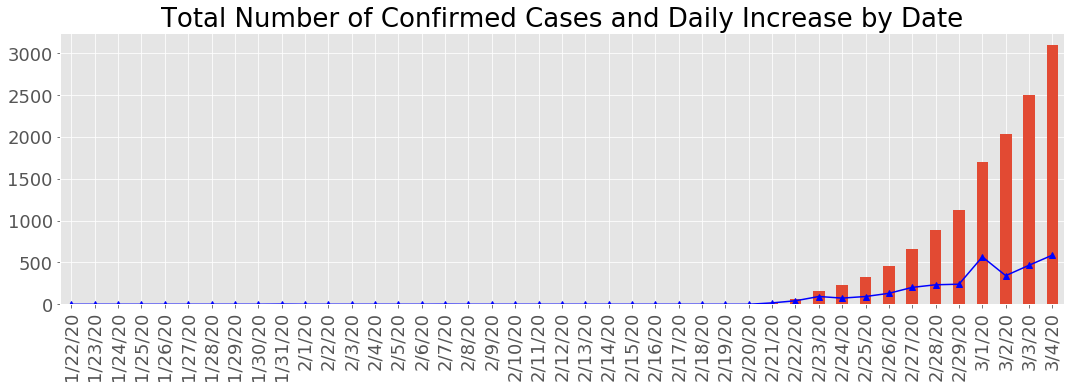

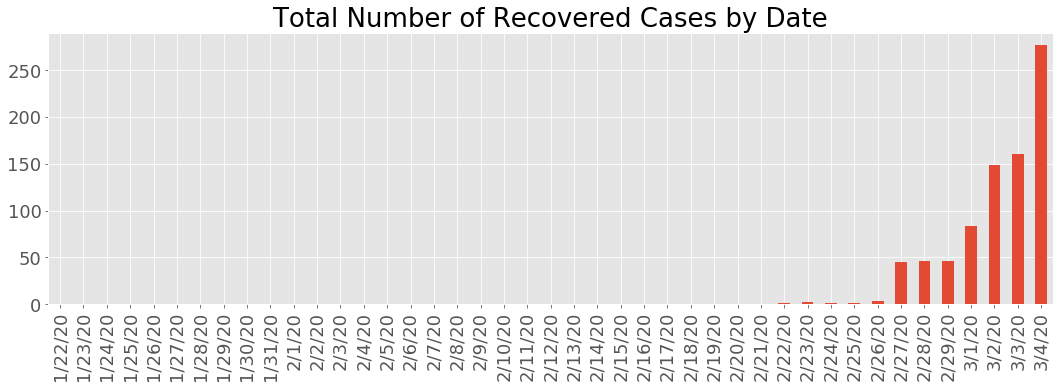

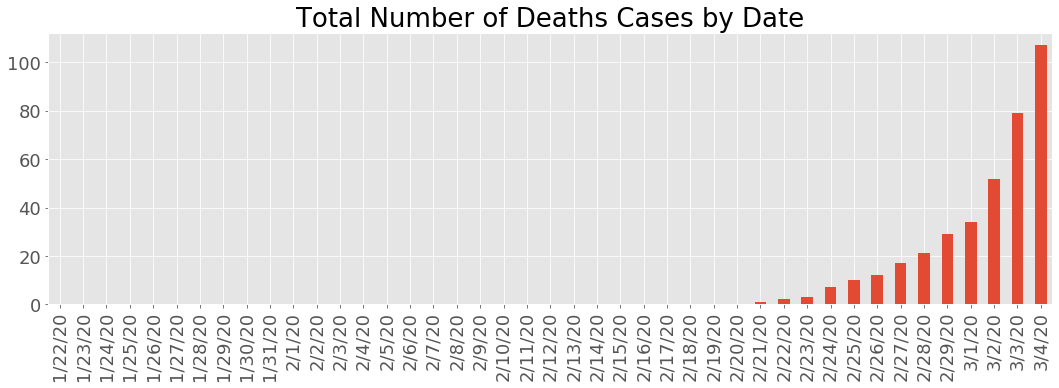

In [2]:
import pandas as pd
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

d0 = date(2020, 1, 22)
d1 = date.today()
delta = d1 - d0
span = delta.days

cal = pd.Series(pd.period_range('1/22/2020', freq='D', periods=span+1)) #calendar
what = "Confirmed", "Recovered", "Deaths" 
for w in what:
    url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-{}.csv".format(w)
    df = pd.read_csv(url, error_bad_lines=False)
    df.head()
    result = df.loc[df["Country/Region"]=="Italy"] #only Italy row
    result = result.drop(['Province/State','Lat','Long'], axis=1)
    result = result.drop(['Country/Region'], axis=1)
    if w == 'Confirmed':
        percent_change = result
        columns=result.columns.tolist()
        data_cols = [c for c in columns]
        percent_change=percent_change.diff(axis=1)
        percent_change[data_cols].sum().plot.line(color='b', linestyle='-', marker='^')
        
        
        ticksize = 18
        titlesize = ticksize + 8
        labelsize = ticksize + 5
        plt.style.use('ggplot')
        figsize = (18, 5)
        params = {'figure.figsize' : figsize,
              'axes.labelsize' : labelsize,
              'axes.titlesize' : titlesize,
              'xtick.labelsize': ticksize,
              'ytick.labelsize': ticksize}

        plt.rcParams.update(params)

        title = "Total Number of {} Cases and Daily Increase by Date".format(w)
        result[data_cols].sum().plot.bar()
    
        plt.title(title)
        plt.show()
    if w == 'Recovered':
        columns=result.columns.tolist()
        data_cols = [c for c in columns]
        ticksize = 18
        titlesize = ticksize + 8
        labelsize = ticksize + 5
        plt.style.use('ggplot')
        figsize = (18, 5)
        params = {'figure.figsize' : figsize,
              'axes.labelsize' : labelsize,
              'axes.titlesize' : titlesize,
              'xtick.labelsize': ticksize,
              'ytick.labelsize': ticksize}

        plt.rcParams.update(params)

        title = "Total Number of {} Cases by Date".format(w)
        result[data_cols].sum().plot.bar()
    
        plt.title(title)
        plt.show()
    if w == 'Deaths':
        
        columns=result.columns.tolist()
        data_cols = [c for c in columns]
        ticksize = 18
        titlesize = ticksize + 8
        labelsize = ticksize + 5
        plt.style.use('ggplot')
        figsize = (18, 5)
        params = {'figure.figsize' : figsize,
              'axes.labelsize' : labelsize,
              'axes.titlesize' : titlesize,
              'xtick.labelsize': ticksize,
              'ytick.labelsize': ticksize}

        plt.rcParams.update(params)

        title = "Total Number of {} Cases by Date".format(w)
        result[data_cols].sum().plot.bar()
    
        plt.title(title)
        plt.show()

In [3]:
df_world = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

df_world_melt = df_world.melt(id_vars=["Province/State", "Country/Region", 
                                       "Lat", "Long"],
                            value_vars=df_world.columns[4:], 
                            var_name="date", value_name="nb_cases")

df_world_melt["Province/State"] = df_world_melt["Province/State"].fillna(" ")

df_world_melt["area"] = df_world_melt["Country/Region"] + " : " +\
    df_world_melt["Province/State"]  

import numpy as np
import math
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_geo(df_world_melt, lat="Lat", lon="Long", color="nb_cases",
                     range_color=[0, df_world_melt["nb_cases"].max()], 
                     text="nb_cases",
                     hover_name="area", 
                     hover_data = ["nb_cases"],
                     size=df_world_melt["nb_cases"].apply(math.sqrt), 
                     size_max=80, 
                     animation_frame=df_world_melt["date"].\
                         astype(np.datetime64).dt.strftime('%b %d'), 
                     projection="natural earth",
            title="COVID-19 Confirmed cases (Areas Animation)")


fig.update_geos(landcolor = 'rgb(217, 217, 217)', 
                showocean=True, oceancolor="LightBlue")
                
geo_world = dict(scope = 'world',
                landcolor = 'rgb(217, 217, 217)', 
                showocean=True, 
                oceancolor="LightBlue")

geo_europe = dict(scope = 'europe',
                landcolor = 'rgb(217, 217, 217)', 
                showocean=True, 
                oceancolor="LightBlue")    
geo_asia = dict(scope = 'asia',
                landcolor = 'rgb(217, 217, 217)', 
                showocean=True, 
                oceancolor="LightBlue")  
geo_usa = dict(scope = 'usa',
                landcolor = 'rgb(217, 217, 217)', 
                showocean=True, 
                oceancolor="LightBlue")  

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            active=0,
            xanchor="left",
            y=0.2,
            buttons=list([
                dict(label="Play",
                          method="animate",
                          args=[None]),
                dict(label="World",
                     method="relayout",
                     args=[{"geo": geo_world}]),
                dict(label="Europe",
                     method="relayout",
                     args=[{"geo": geo_europe}]),
            ]),
        )
    ])

fig.update_layout(height=800, margin={"r":0,"t":50,"l":0,"b":0})
fig.show()